In [1]:
from sklearn.datasets import make_circles

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = make_circles(n_samples=600, noise=1, factor=0.9)

In [3]:
"""
existen 3 tipos de redes neuronales:
monocapa
multicapa
convolucional

y se refieren a:
convencionales
aprendizaje profundo

"""

'\nexisten 3 tipos de redes neuronales:\nmonocapa\nmulticapa\nconvolucional\n\ny se refieren a:\nconvencionales\naprendizaje profundo\n\n'

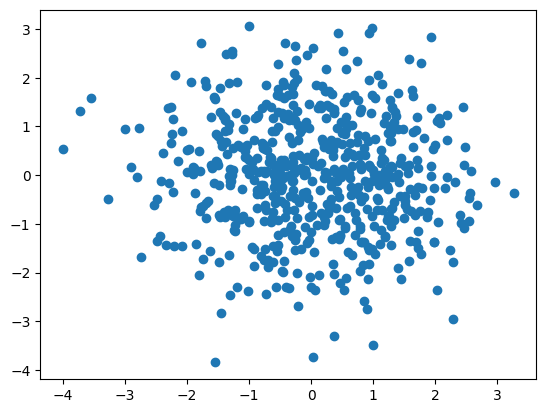

In [4]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [5]:
"""
Clase dedicada a las capas de una red neuronal
"""

class NeuralLayer:
    def __init__(self,n_perceptrons, edges, activation_functions):
        self.n_perceptrons = n_perceptrons
        self.edges = edges
        self.activation_functions = activation_functions
        #utilizaremos valores aleatorios para el peso para simplificar un poco el desarrollo 
        self.weights = (np.random.rand(edges, n_perceptrons) *2) - 1
        self.slopes = (np.random.rand(1,n_perceptrons)*2) - 1

    def set_weights(self, weights):
        self.weights = weights

    def set_slopers(self, slopes):
        self.slopes = slopes
        

### definir la estructura de las funciones de activacion

In [6]:
"""
Para este apartado utilizaremos la funcion sigmoidea --- > (1 / 1 + e ^ (-x)), esta funcion es la que se aplica en el Forward Pass
para el BackPropagation se utiliza la derivada de esta funcion.

lambda parametros_1,parametros_2, ... , parametros_n: operations (parametros_1 + parametros_2)
"""
# esta es la funcion de activacion sigmoide, en la pos sigmoide[0] se encuentra la funcion normal y la [1] la derivada
sigmoide = (
    lambda x: 1.0 / (1.0 + np.e **(-x)),
    lambda x: x * (1.0 - x)
)

### Definimos la topologia de nuestra red

In [7]:
parameters = 2
result = 1
topology = [parameters, 3 , 4 , 2, result]

ahora definiremos una funcion de perdida
### esta funcion servira para medir la exactitud y hacer correccciones

In [8]:
### esto nos devolvera el error cuadratico medio
sqr_mean_error = (
    lambda y_predicted, y_real: np.mean((y_predicted - y_real) ** 2),
    lambda y_predicted, y_real: y_predicted - y_real
)

### Inicializamos la red neuronal segun la topologia puesta 

In [19]:
def init_neural_network(topology, activation_functions):
    neural_network = []
    for index, layer in enumerate(topology[:-1]):
        neural_network.append(NeuralLayer(
            edges=topology[index + 1],
            n_perceptrons= topology[index],
            activation_functions=activation_functions
        ))
    return neural_network

### Entrenaremos nuestra red neuronal

In [11]:
def fit(data_x,data_y,neural_network, loss_function, learning_rate = 0.5):
    ### definiremos una estructura de salida
    output = [(None, data_x)]
    # recorremos las capas de la red neuronal
    for index in enumerate(neural_network):
        ### definir las operaciones del forward pass
        # en otras palabras la suma producto de los datos de entrada por sus peros y los pasamos a la union sumadora
        # dicho de otra forma, aplicamos una multiplicacion matricial
        weigth_sum = output[-1][1] @ neural_network[index].weights + neural_network[index].slopes
        # Los valores obtenidos de la union sumadora, pasan a la funcion de activacion
        activated = np.vectorize(neural_network[index].activation_functions[0](weigth_sum))
        output.append((weigth_sum, activated))
    # ahora aplicamos backpropagations, los deltas seran los errores calculados de cada salida
    deltas = []
    #range devuelve una serie numerica comprendida entre el parametro inicial y el parametro final - 1
    for position in reversed(range(0,len(neural_network))):
        # recupera el ultimo valor arrojado por la capa siguiente
        activated = output[position + 1][1]
        # si la posicion es igual a la ultima capa, insertamos en el registro de deltas directamente nuestra salida pasada 
        # por la funcion de perdida
        if(position == len(neural_network) - 1):
            deltas.insert(0,loss_function[1](activated,data_y) * neural_network[position].activation_functions[1](activated))
        # caso contrario insertamos en los deltas la transpuesta de los pesos calculados en la capa anterior y multiplicando 
        # por la salida de la capa siguiente pasada por la funcion de perdida    
        else:
            deltas.insert(0,deltas[0] @ weigth_temp.T * neural_network[position].activation_functions[1](activated))
        # este auxiliar guarda los pesos de la capa anterior para ser usados en las siguientes iteraciones 
        weigth_temp = neural_network[position].weights
        # Aplicamos la tecnica de la gradiente descenso para transmitir el error
        neural_network[position].weights = neural_network[position].weights - output[position][1].T @ deltas[0] * learning_rate
        neural_network[position].slopes = neural_network[position].slopes - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate

### empezaremos a aplicar la red neuronal

In [20]:
neuralNet = init_neural_network(topology,sigmoide)

In [21]:
neuralNet